### DATA PT12 - Proyecto final - Grupo 2
#### Control de calidad de los datos del archivo Yelp business

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Leemos archivo pickle
# "C:\Users\victo\Documents\__Soy Henry\_PF\notebooks\datos\yelp\business.pkl"
# "C:\Users\victo\Documents\__Soy Henry\_PF\notebooks\datos\yelp_yelp\yelp_academic_dataset_business.json"
archivo = 'datos/yelp_yelp/yelp_academic_dataset_business.json'
df = pd.read_json(archivo, lines=True)
df.to_pickle(archivo.replace(".json", ".pkl"))  # Guardar como .pkl
business = pd.read_pickle("datos/yelp_yelp/yelp_academic_dataset_business.pkl")

business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
# Revisamos columnas
business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [5]:
# Revisamos Shape
business.shape

(150346, 14)

In [6]:
# Eliminamos columnas que no serán utilizadas
business = business.drop(columns=["is_open", "attributes",  "hours"])

business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,"Brewpubs, Breweries, Food"


In [21]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  categories    150243 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 12.6+ MB


En el archivo con datos de Yelp se observan 150.346 filas. Se eliminarons las columnas "is_open", "attributes",  "hours" que no se usaran. Hay 103 filas que tiene valor nulo en categoria. Estos se descartaran cuando seleccionemos por categoria. Seleccionaremos los locales donde se venden pizza del estado de NY y NJ.

In [7]:
# Buscamos NaN en columna 'state'
business['state'].isna().sum()

np.int64(0)

In [8]:
# Buscamos NaN en columna 'business_id'
business['business_id'].isna().sum()

np.int64(0)

In [9]:
# Guardar como Parquet (más eficiente) y obtener su tamaño
#business.to_parquet(r"C:\Users\felip\Desktop\Stuff\Cursos\SoyHenry\Clases\LABS\PF\PF_google_yelp\datasets\business.parquet")
#print("Peso del Parquet:", os.path.getsize(r"C:\Users\felip\Desktop\Stuff\Cursos\SoyHenry\Clases\LABS\PF\PF_google_yelp\datasets\business.parquet") / (1024 * 1024), "MB")

business.to_parquet('datos/yelp_yelp/business.parquet' , engine='fastparquet')

In [10]:
unique_categories = pd.DataFrame(business['categories'].unique())

In [11]:
print(unique_categories)

                                                       0
0      Doctors, Traditional Chinese Medicine, Naturop...
1      Shipping Centers, Local Services, Notaries, Ma...
2      Department Stores, Shopping, Fashion, Home & G...
3      Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                              Brewpubs, Breweries, Food
...                                                  ...
83156  Restaurants, Comfort Food, Food, Food Trucks, ...
83157  Pets, Nurseries & Gardening, Pet Stores, Hobby...
83158  Shopping, Jewelry, Piercing, Toy Stores, Beaut...
83159  Fitness/Exercise Equipment, Eyewear & Optician...
83160  Beauty & Spas, Permanent Makeup, Piercing, Tattoo

[83161 rows x 1 columns]


In [12]:
unique_resto = unique_categories[unique_categories[0].str.lower().str.contains("restaurant", na=False)]

In [13]:
# print(unique_resto)
print(unique_resto[0].to_string())

3        Restaurants, Food, Bubble Tea, Coffee & Tea, B...
5        Burgers, Fast Food, Sandwiches, Food, Ice Crea...
8        Pubs, Restaurants, Italian, Bars, American (Tr...
9        Ice Cream & Frozen Yogurt, Fast Food, Burgers,...
11              Vietnamese, Food, Restaurants, Food Trucks
12       American (Traditional), Restaurants, Diners, B...
14             Food, Delis, Italian, Bakeries, Restaurants
15                       Sushi Bars, Restaurants, Japanese
19                                     Korean, Restaurants
20       Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...
22                  Steakhouses, Asian Fusion, Restaurants
23                                    Restaurants, Italian
24                                   Hot Dogs, Restaurants
27                          Restaurants, Japanese, Seafood
28       Cocktail Bars, Bars, Italian, Nightlife, Resta...
29           Pizza, Chicken Wings, Sandwiches, Restaurants
31                         Pizza, Restaurants, Salad, So

In [14]:
unique_pizza = unique_categories[unique_categories[0].str.lower().str.contains("pizza", na=False)]

In [15]:
print(unique_pizza[0].to_string())

29           Pizza, Chicken Wings, Sandwiches, Restaurants
31                         Pizza, Restaurants, Salad, Soup
33                                      Pizza, Restaurants
41       Restaurants, Specialty Food, Steakhouses, Food...
58                                      Restaurants, Pizza
180          Restaurants, Sandwiches, Pizza, Chicken Wings
196      Arts & Entertainment, Nightlife, Jazz & Blues,...
214      Bars, Lounges, Nightlife, Pizza, Restaurants, ...
220      Sports Bars, Bars, Nightlife, Italian, Restaur...
238        Pizza, Restaurants, Bars, Nightlife, Sandwiches
247             Italian, Chicken Wings, Pizza, Restaurants
265      Italian, Pizza, Gluten-Free, Restaurants, Bars...
291      Ethnic Food, Specialty Food, Restaurants, Food...
311          Chicken Wings, Sandwiches, Restaurants, Pizza
325                            Mexican, Pizza, Restaurants
329      Pizza, Fast Food, Gluten-Free, Restaurants, Salad
365      Restaurants, Italian, Nightlife, Southern, Bar.

In [28]:
# selecciono los locales que venden pizza. Para los estados de NJ y NY.
# Remember: The & and | operators require both sides of the condition to be in parentheses when used in pandas filtering.
# Your best bet is to use .isin(), as it is more readable and efficient:
yelp_pizza_NJ = business[
    business['categories'].str.lower().str.contains("pizza", na=False) &
    business['state'].isin(['NJ', 'NY'])
]

In [30]:
yelp_pizza_NJ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 764 to 150236
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   717 non-null    object 
 1   name          717 non-null    object 
 2   address       717 non-null    object 
 3   city          717 non-null    object 
 4   state         717 non-null    object 
 5   postal_code   717 non-null    object 
 6   latitude      717 non-null    float64
 7   longitude     717 non-null    float64
 8   stars         717 non-null    float64
 9   review_count  717 non-null    int64  
 10  categories    717 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 67.2+ KB


In [31]:
yelp_pizza_NJ['state'].unique()

array(['NJ'], dtype=object)

En el dataframe business con datos de Yelp hay 717 locales donde se vende pizza. Son del estado de New Jersey (NJ). El archivo usado es para fines educativos y solo incluye datos de algunos estados de USA, entre los que no se incluyen el estado de New York.

In [32]:
yelp_pizza_NJ.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories
764,Mt1FB8hM4XTi3Tk4i0q5gQ,Nicola's Pizza,8 N Franklin St,Lambertville,NJ,08530,40.366418,-74.941678,4.0,54,"Restaurants, Pizza, Salad"
830,clOOOBYvd1aUcFxA9uhFjQ,Tony Sopranos Pizza,312 Broad St,Florence Township,NJ,08518,40.119835,-74.805042,3.0,21,"Pizza, Restaurants"
1544,WMI3BjDby0U-IF6NnN0SXA,Cherry Hill Pizza,110 Barclay Shopping Ctr,Cherry Hill,NJ,08034,39.910068,-74.995827,3.0,27,"Restaurants, Pizza"
1900,hWETQd1m9UVNGyQ-iJhIbA,Sangarlo's Pizza,112 New Broadway,Brooklawn,NJ,08030,39.877995,-75.123293,2.5,7,"Italian, Restaurants, Pizza"
2436,sqCUiy9gTgfROmjX6KOHXA,Rosa Pizza,1870 N Olden Ave,Ewing Township,NJ,08638,40.250766,-74.778394,2.5,10,"Restaurants, Pizza"


Reviso duplicados. Y Outliers en las columnas stars y review_count

In [33]:
# reviso duplicados
df_dup = yelp_pizza_NJ[yelp_pizza_NJ.duplicated(subset=['business_id'], keep=False)]
df_dup = df_dup.sort_values(['business_id'])

print(df_dup)

Empty DataFrame
Columns: [business_id, name, address, city, state, postal_code, latitude, longitude, stars, review_count, categories]
Index: []


No hay datos duplicados de pizzerias

min,  1.0
max,  5.0
mean,  3.403068340306834


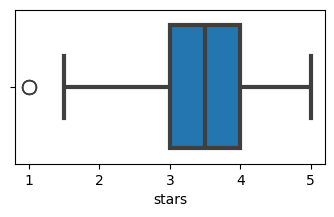

In [34]:
plt.figure(figsize=(4, 2))
sns.boxplot(x = 'stars', data = yelp_pizza_NJ,
            fliersize = 10, # Outlier size
            linewidth = 3,  # Lines width
            saturation = 0.95) # Fill color saturation

# reviso valor maximo y minimo. Creo que estan en el rango correcto
print('min, ', yelp_pizza_NJ['stars'].min())
print('max, ', yelp_pizza_NJ['stars'].max())
print('mean, ', yelp_pizza_NJ['stars'].mean())

El rango de Stars (calificaciones en Yelp) es entre 1.0 y 5.0. El valor promedio es de 3.4

<Axes: xlabel='review_count'>

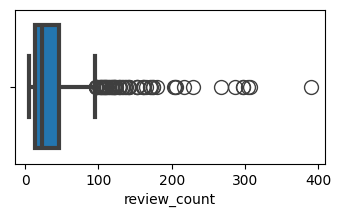

In [35]:
# reviso outliers en cantidad de reviews
plt.figure(figsize=(4, 2))
sns.boxplot(x = 'review_count', data = yelp_pizza_NJ,
            fliersize = 10, # Outlier size
            linewidth = 3,  # Lines width
            saturation = 0.95) # Fill color saturation

In [36]:
print(yelp_pizza_NJ[['review_count']].describe())

       review_count
count    717.000000
mean      38.193863
std       44.928467
min        5.000000
25%       13.000000
50%       23.000000
75%       46.000000
max      390.000000


El 75% de locales tiene 46 reviews o menos. Hay un local con 390 reviews. Reviso los que tienen mas de 300 reviews

In [37]:
yelp_pizza_NJ[yelp_pizza_NJ['review_count'] > 300]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories
79104,1hPvAr6D7yPpGbD_4RMqmQ,Treno Pizza Bar,233 Haddon Ave,Westmont,NJ,08108,39.908728,-75.046305,3.5,304,"Restaurants, Bars, Italian, Pizza, Nightlife"
86367,WNqqyUtEmrqCBEHNV9sj5Q,Marcello's Coal Fired Restaurant & Pizza,206 Farnsworth Ave,Bordentown,NJ,08505,40.146830,-74.712605,4.0,390,"Italian, Nightlife, Restaurants, Bars, Pizza, ..."
139815,X4mouE_cMiwbfyCPZ_K-FA,Marhaba,77 S Union St,Lambertville,NJ,08530,40.362604,-74.943868,4.0,307,"Halal, Lebanese, Mediterranean, Greek, Restaur..."


In [41]:
# Eliminamos columnas que no serán utilizadas
yelp_pizza_NJ = yelp_pizza_NJ.drop(columns=["categories"])

In [42]:
# guardo el archivo en formato parquet
yelp_pizza_NJ.to_parquet('datos/yelp_yelp/yelp_pizza_NJ202502092108.parquet' , engine='fastparquet')